In [140]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Best Results from LLM

| Dataset | Model | K-shot | F1 Score |
|---------|-------|--------|----------|
| Gossipcop | Llama | 10 | 0.6520 |
| Politifact | Llama | 5 | 0.7862 |









# GossipCop

In [141]:
# K-shot values (x-axis)
k_shots = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

# F1 Scores data for PolitiFact based on the provided image
# (Real: 624, Fake: 432)
data = {
    # MLP / Sequence Model
    # "MLP": [0.4480479239826482, 0.4480479239826482, 0.4480479239826482, 0.4480479239826482, 0.4480479239826482, 0.20837101031505678, 0.1584251968503937, 0.3937524550494808, 0.369476727036753, 0.1584251968503937, 0.3251654758067668, 0.3204456097119074, 0.48722756393881494, 0.1584251968503937],
    "LSTM": [0.4480479239826482, 0.4480479239826482, 0.4480479239826482, 0.4480479239826482, 0.4480479239826482, 0.4480479239826482, 0.4480479239826482, 0.4480479239826482, 0.4480479239826482, 0.4480479239826482, 0.4480479239826482, 0.4480479239826482, 0.4480479239826482, 0.4480479239826482],
    # Language Model
    "BERT": [0.21721449553106068, 0.39095803723350664, 0.33981998941114183, 0.5059865664431236, 0.545900974025974, 0.4489783828250431, 0.5167989644604344, 0.4956483351452377, 0.5106455603931384, 0.5041370593770967, 0.4994288849956804, 0.5404571169947952, 0.4918823837029642, 0.4610573474895161],
    # "RoBERTa": [0.4480479239826482, 0.4480479239826482, 0.4480479239826482, 0.4480479239826482, 0.4480479239826482, 0.4480479239826482, 0.4480479239826482, 0.4480479239826482, 0.4480479239826482, 0.4480479239826482, 0.4480479239826482, 0.4480479239826482, 0.4480479239826482, 0.4480479239826482],
    "DistilBERT": [0.539681524685335, 0.5016768447060135, 0.5753744909281324, 0.5983801415302963, 0.5427770950216155, 0.5450436581776739, 0.5076999025886729, 0.4879693708228229, 0.5080864635697339, 0.4925643146505907, 0.5469893682860267, 0.5088828555374089, 0.49219733726279685, 0.595438459343999],
    # "DeBERTa": [0.1584251968503937, 0.1584251968503937, 0.1584251968503937, 0.1584251968503937, 0.1584251968503937, 0.1584251968503937, 0.1584251968503937, 0.1584251968503937, 0.1584251968503937, 0.1584251968503937, 0.1584251968503937, 0.1584251968503937, 0.1584251968503937, 0.1584251968503937],
    # LLM
    "Llama": [0.6679255164712748, 0.6457010103666688, 0.6177880459599309, 0.6577314598213395, 0.6292252082406891, 0.6495745254394713, 0.6520353204830424, 0.6629755533652726, 0.6513694713826091, 0.6502522676893367, 0.651766327136569, 0.6491066846449868, 0.6494006684110187, 0.6503160436862094],
    "Gemma": [0.5962110645690657, 0.5925529139365211, 0.5143715545038983, 0.5418738540690963, 0.5614267062927683, 0.5795503126600933, 0.47562651960638513, 0.5061918317662056, 0.5910820424656917, 0.5431205987907018, 0.46079071370083313, 0.5645353746215376, 0.4310082715635607, 0.3847396204678999],
    # Heterogeneous Graph (Single)
    # "roberta / knn / multiview": [0.6265521877340143, 0.6492144552723639, 0.6165259267396411, 0.5986024546002373, 0.6243032573507503, 0.6069496428746547, 0.5977997310200622, 0.6179193355663943, 0.6156381046819243, 0.5977997310200622, 0.596686455540651, 0.5976047904191617, 0.5944897176646284, 0.596686455540651], 
    # "deberta / knn / multiview": [0.6305243310609029, 0.6355242172416687, 0.6124099523486908, 0.5978579316632582, 0.6150771674886796, 0.5985268633742575, 0.5994938139643458, 0.610809064662296, 0.6119660123863686, 0.5991931376178405, 0.600095785440613, 0.5980245320056388, 0.5961193978136965, 0.5997946963216424], 
    # "roberta / knn": [0.6234885622129405, 0.6214820085918998, 0.6031698740617113, 0.5879838977514517, 0.6052794520293829, 0.5924535612387332, 0.5961033307417212, 0.6078703982624197, 0.6112878376431208, 0.5963497348624984, 0.5960480280300678, 0.5981077338959584, 0.592825013310812, 0.5969539018759807], 
    # "deberta / knn": [0.6255795355984044, 0.6198110185666093, 0.6016873258252569, 0.5886307219017464, 0.605831804663597, 0.5928805576265369, 0.5959055253125898, 0.6089156893530694, 0.6114997645029868, 0.5959055253125898, 0.5956047167620404, 0.5982061120419853, 0.5930514534323731, 0.5956047167620404], 
    # Heterogeneous Graph (MultiGraph)
    # "Ours(Single)": [0.6255795355984044, 0.6198110185666093, 0.6016873258252569, 0.5886307219017464, 0.605831804663597, 0.5928805576265369, 0.5959055253125898, 0.6089156893530694, 0.6114997645029868, 0.5959055253125898, 0.5956047167620404, 0.5982061120419853, 0.5930514534323731, 0.5956047167620404],
    # "Ours(MultiGraph)": [0.648873820599753, 0.6844908794318176, 0.6550131955899733, 0.654303149345881, 0.6627340849437653, 0.6402027660452099, 0.6465655439884916, 0.6623767541641872, 0.6583036405615525, 0.6504534568039857, 0.6455462706786279, 0.6535503487369851, 0.6339867986635277, 0.6558706267078798], 
    "Ours": [0.648873820599753, 0.6844908794318176, 0.6550131955899733, 0.654303149345881, 0.6627340849437653, 0.6402027660452099, 0.6465655439884916, 0.6623767541641872, 0.6583036405615525, 0.6504534568039857, 0.6455462706786279, 0.6535503487369851, 0.6339867986635277, 0.6558706267078798], 
}

# for model, record in data.items():
#     print(len(record))

In [142]:
# show all available linestyle and marker
import matplotlib.pyplot as plt

# Print all available line styles
# print("Line Styles:")
# for style in plt.Line2D.lineStyles.keys():
#     print(f"- {style}")

# print("\nMarkers:")
# for marker in plt.Line2D.markers.keys():
#     print(f"- {marker}")

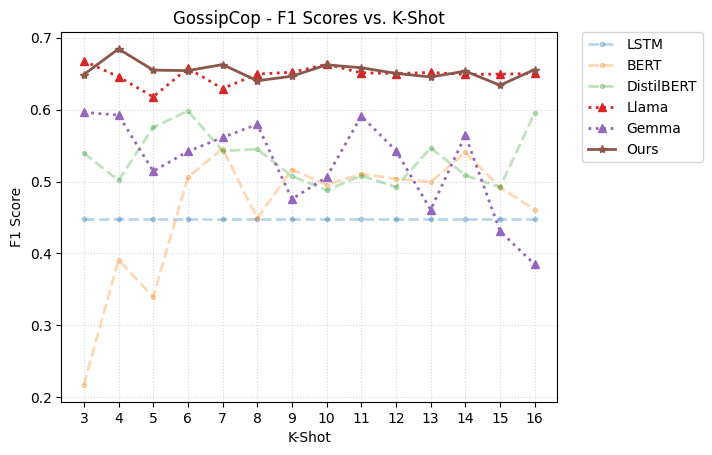

In [143]:
ours = ["Ours(Single)", "Ours(MultiGraph)", "Ours"]
highlight = ["Llama", "Gemma"]
colors = plt.get_cmap("tab10").colors
fig, ax = plt.subplots()

for idx, (series_name, f1_sequence) in enumerate(data.items()):
    if series_name in ours:
        ax.plot(k_shots, f1_sequence, label=series_name, marker="*", linewidth=2, color=colors[idx])
    elif series_name in highlight:
        ax.plot(k_shots, f1_sequence, label=series_name, marker="^", linewidth=2, color=colors[idx], alpha=1, linestyle=":")
    else:
        ax.plot(k_shots, f1_sequence, label=series_name, marker=".", linewidth=2, color=colors[idx], alpha=0.3, linestyle="--")

ax.set_xlabel("K-Shot")
ax.set_ylabel("F1 Score")
ax.set_title("GossipCop - F1 Scores vs. K-Shot")
ax.set_xticks(range(3, 17))
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True, linestyle=":", alpha=0.5)
plt.show()

# PolitiFact

In [144]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [145]:
# K-shot values (x-axis)
k_shots = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

# F1 Scores data for PolitiFact based on the provided image
# (Real: 624, Fake: 432)

data = {
    # MLP / Sequence Model
    # "MLP": [0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.22137404580152673, 0.43194919394235465, 0.43679163034001744, 0.22137404580152673, 0.47914057230947105, 0.43679163034001744, 0.744360902255639, 0.48941085868309586], 
    "LSTM": [0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.41714285714285715], 
    # Language Model
    "BERT": [0.2666329113924051, 0.2666329113924051, 0.3005485893416928, 0.27631060307449745, 0.2885352195697023, 0.35222276502198335, 0.3519445514054679, 0.33229115779189056, 0.43983042682339335, 0.40144300144300143, 0.4304967269926839, 0.41085868309587986, 0.40052028133731576, 0.34893617021276596], 
    # "RoBERTa": [0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.41714285714285715], 
    "DistilBERT": [0.5603448275862069, 0.6504032258064516, 0.5827001753360608, 0.6056166056166056, 0.5887096774193548, 0.6178227848101265, 0.6040372670807453, 0.6480184042664436, 0.697515083341855, 0.5584415584415584, 0.6060881417537483, 0.6056166056166056, 0.5865546218487395, 0.61133365901319],
    # "DeBERTa": [0.22137404580152673, 0.22137404580152673, 0.22137404580152673, 0.22137404580152673, 0.22137404580152673, 0.22137404580152673, 0.22137404580152673, 0.22137404580152673, 0.22137404580152673, 0.22137404580152673, 0.22137404580152673, 0.22137404580152673, 0.22137404580152673, 0.22137404580152673],
    # LLM
    "Llama": [0.7419028340080972, 0.7373627862854045, 0.7861635220125787, 0.7650088087816778, 0.7548076923076923, 0.7548076923076923, 0.7880519480519481, 0.7650088087816778, 0.7373627862854045, 0.7291404612159329, 0.7291404612159329, 0.7193175564116676, 0.7200635562617362, 0.7001763668430335], 
    "Gemma": [0.712934819317798, 0.7166666666666667, 0.7031185031185031, 0.6994949494949495, 0.6911764705882353, 0.6470588235294117, 0.6178227848101265, 0.546218487394958, 0.6565656565656566, 0.6357142857142857, 0.625, 0.6351010101010102, 0.6182952182952183, 0.6056166056166056], 
    # "Ours(Single)": [0.754442279032443, 0.8080796900940785, 0.7818304626815265, 0.7984189723320159, 0.8146297137664698, 0.8417472252058718, 0.837800999545661, 0.8507261060452549, 0.8479880774962743, 0.8277608915906788, 0.8479880774962743, 0.8277608915906788, 0.8246016278803163, 0.8347222222222223], 
    # "Ours(MultiGraph)": [0.7919484702093398, 0.8146297137664698, 0.733347275959427, 0.7825159914712154, 0.8211572180011689, 0.8432147562582345, 0.9036372224846481, 0.8479880774962743, 0.8555398191524131, 0.8246016278803163, 0.8211572180011689, 0.8047956771361027, 0.8450029222676798, 0.8277608915906788],
    "Ours": [0.7919484702093398, 0.8146297137664698, 0.733347275959427, 0.7825159914712154, 0.8211572180011689, 0.8432147562582345, 0.9036372224846481, 0.8479880774962743, 0.8555398191524131, 0.8246016278803163, 0.8211572180011689, 0.8047956771361027, 0.8450029222676798, 0.8277608915906788]
}

# for model, record in data.items():
#     print(len(record))

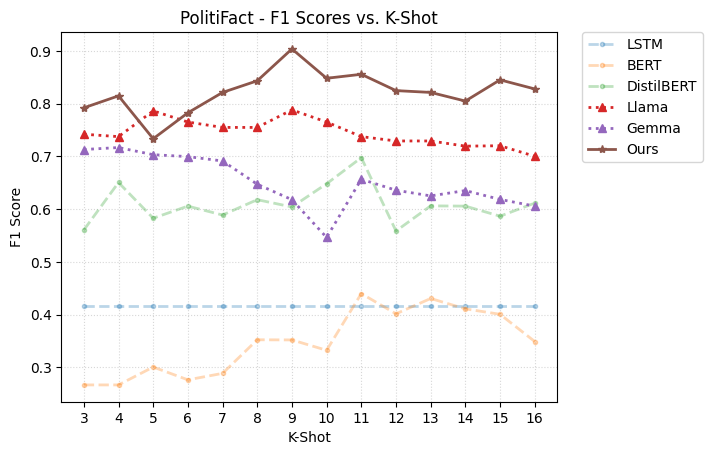

In [146]:
ours = ["Ours(Single)", "Ours(MultiGraph)", "Ours"]
highlight = ["Llama", "Gemma"]
colors = plt.get_cmap("tab10").colors
fig, ax = plt.subplots()

for idx, (series_name, f1_sequence) in enumerate(data.items()):
    if series_name in ours:
        ax.plot(k_shots, f1_sequence, label=series_name, marker="*", linewidth=2, color=colors[idx])
    elif series_name in highlight:
        ax.plot(k_shots, f1_sequence, label=series_name, marker="^", linewidth=2, color=colors[idx], alpha=1, linestyle=":")
    else:
        ax.plot(k_shots, f1_sequence, label=series_name, marker=".", linewidth=2, color=colors[idx], alpha=0.3, linestyle="--")

ax.set_xlabel("K-Shot")
ax.set_ylabel("F1 Score")
ax.set_title("PolitiFact - F1 Scores vs. K-Shot")
ax.set_xticks(range(3, 17))
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True, linestyle=":", alpha=0.5)
plt.show()